In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import r2_score,accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
btc_data = pd.read_csv('1d_data/BTCUSDT-1d-data.csv', index_col = 'timestamp')
eth_data = pd.read_csv('1d_data/ETHUSDT-1d-data.csv', index_col = 'timestamp')
bnb_data = pd.read_csv('1d_data/BNBUSDT-1d-data.csv', index_col = 'timestamp')

In [3]:
#change date index to datetime index

btc_data.index = pd.to_datetime(btc_data.index)
eth_data.index = pd.to_datetime(eth_data.index)
bnb_data.index = pd.to_datetime(bnb_data.index)

In [4]:
# create df with same length

btc_data = btc_data.loc['2017-11-6':'2022-4-15']
eth_data = eth_data.loc['2017-11-6':'2022-4-15']
bnb_data = bnb_data.loc[:'2022-4-15']


In [5]:
btc_data

,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,tb_quote_av,ignore
timestamp,,,,,,,,,,,
2017-11-06,7345.10,7401.00,6906.00,6960.12,1763.019261,1510012799999,1.267352e+07,13525,730.003787,5.258427e+06,19567.371201
2017-11-07,6981.72,7198.49,6901.00,7064.04,1440.259494,1510099199999,1.017327e+07,13132,591.187992,4.181187e+06,20220.523544
2017-11-08,7070.00,7770.02,6651.00,7303.00,2822.298802,1510185599999,2.049129e+07,24381,1291.344472,9.394534e+06,20208.860591
2017-11-09,7303.01,7392.00,7015.00,7079.99,1913.398308,1510271999999,1.379853e+07,13818,724.154878,5.221301e+06,19895.284338
2017-11-10,7079.00,7279.91,6255.01,6506.98,3254.704105,1510358399999,2.208335e+07,18889,1565.261439,1.059446e+07,19363.409569
...,...,...,...,...,...,...,...,...,...,...,...
2022-04-11,42158.85,42414.71,39200.00,39530.45,63560.447210,1649721599999,2.602039e+09,1385924,30543.055610,1.251713e+09,0.000000
2022-04-12,39530.45,40699.00,39254.63,40074.94,57751.017780,1649807999999,2.309514e+09,1153667,28344.997880,1.133659e+09,0.000000
2022-04-13,40074.95,41561.31,39588.54,41147.79,41342.272540,1649894399999,1.677171e+09,948061,20522.546990,8.326534e+08,0.000000


In [6]:
prices = pd.concat([btc_data['close'], eth_data['close'], bnb_data['close']], axis=1, keys=['BTC', 'ETH', 'BNB'])

In [7]:
crypto_volume = pd.concat([btc_data['volume'], 
                           eth_data['volume'], 
                           bnb_data['volume']], axis = 1, keys = ['BTC', 'ETH', 'BNB'])

number_trades = pd.concat([btc_data['trades'], 
                           eth_data['trades'], 
                           bnb_data['trades']], axis = 1, keys = ['BTC', 'ETH', 'BNB'])

dollar_volume = pd.concat([btc_data['quote_av'], 
                           eth_data['quote_av'], 
                           bnb_data['quote_av']], axis = 1, keys = ['BTC', 'ETH', 'BNB'])

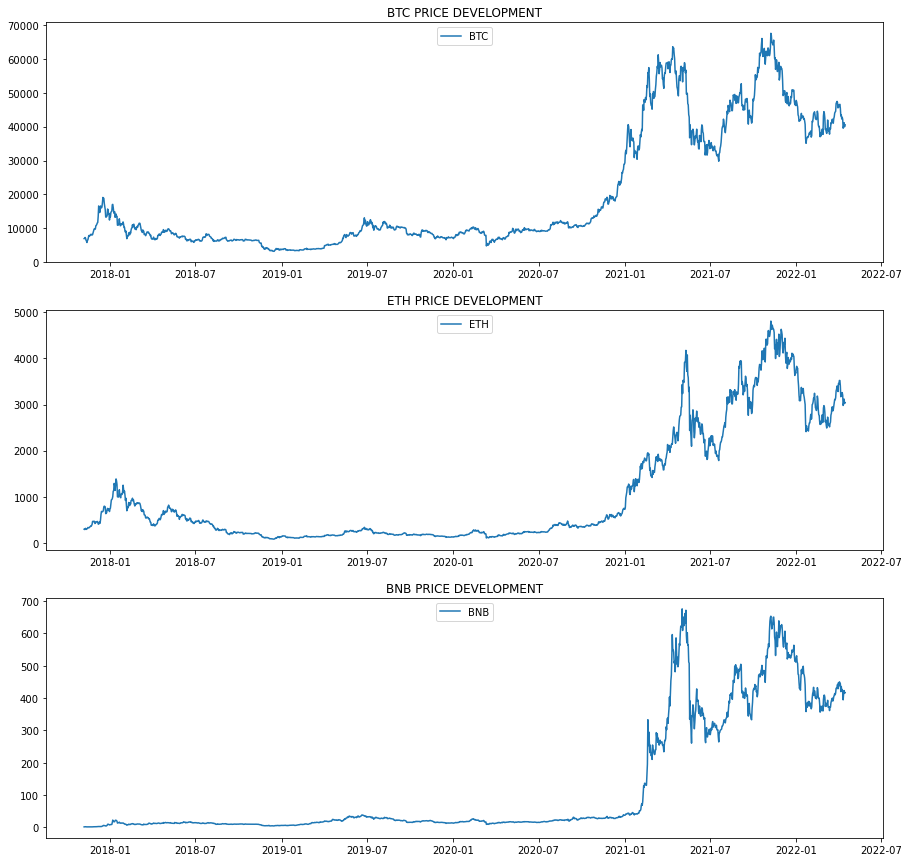

In [8]:
fig, axs = plt.subplots(3)
fig.set_figheight(15)
fig.set_figwidth(15)

axs[0].plot(prices['BTC'].index, prices['BTC'], label = 'BTC')
axs[0].set_title('BTC PRICE DEVELOPMENT')

axs[1].plot(prices['ETH'].index, prices['ETH'], label = 'ETH')
axs[1].set_title('ETH PRICE DEVELOPMENT')

axs[2].plot(prices['BNB'].index, prices['BNB'], label = 'BNB')
axs[2].set_title('BNB PRICE DEVELOPMENT')


axs[0].legend(loc='upper center')
axs[1].legend(loc='upper center')
axs[2].legend(loc='upper center')
plt.show()

In [9]:
daily_returns = prices.pct_change()[1:]

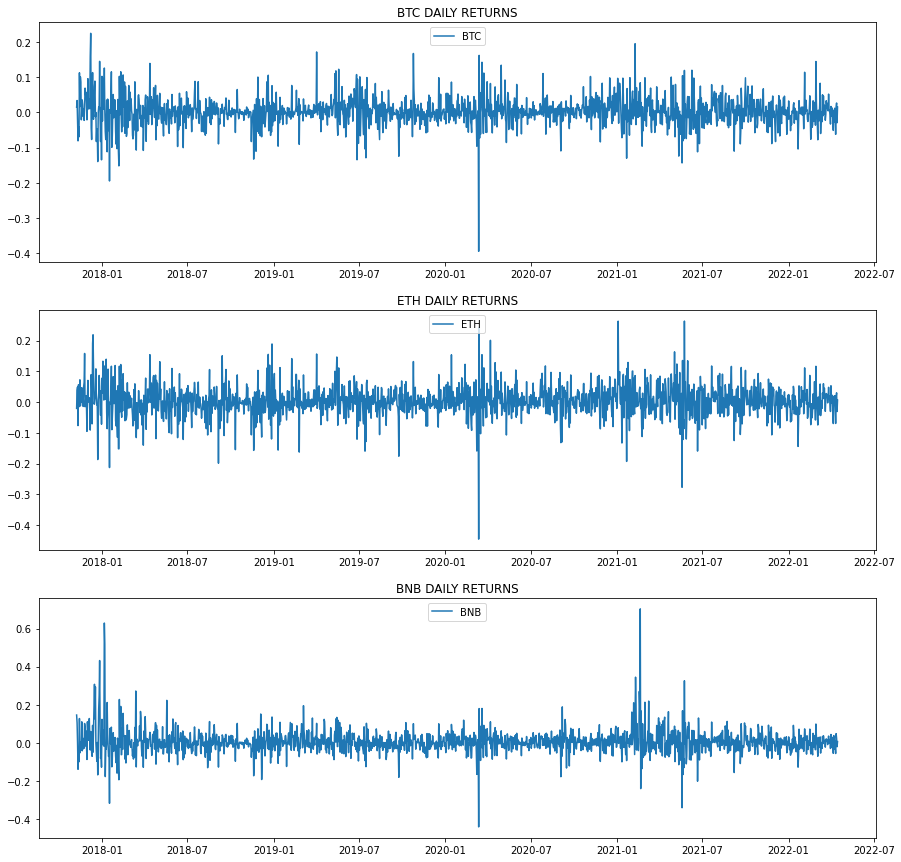

In [10]:
fig, axs = plt.subplots(3)
fig.set_figheight(15)
fig.set_figwidth(15)

axs[0].plot(daily_returns['BTC'].index, daily_returns['BTC'], label = 'BTC')
axs[0].set_title('BTC DAILY RETURNS')

axs[1].plot(daily_returns['ETH'].index, daily_returns['ETH'], label = 'ETH')
axs[1].set_title('ETH DAILY RETURNS')

axs[2].plot(daily_returns['BNB'].index, daily_returns['BNB'], label = 'BNB')
axs[2].set_title('BNB DAILY RETURNS')


axs[0].legend(loc='upper center')
axs[1].legend(loc='upper center')
axs[2].legend(loc='upper center')
plt.show()

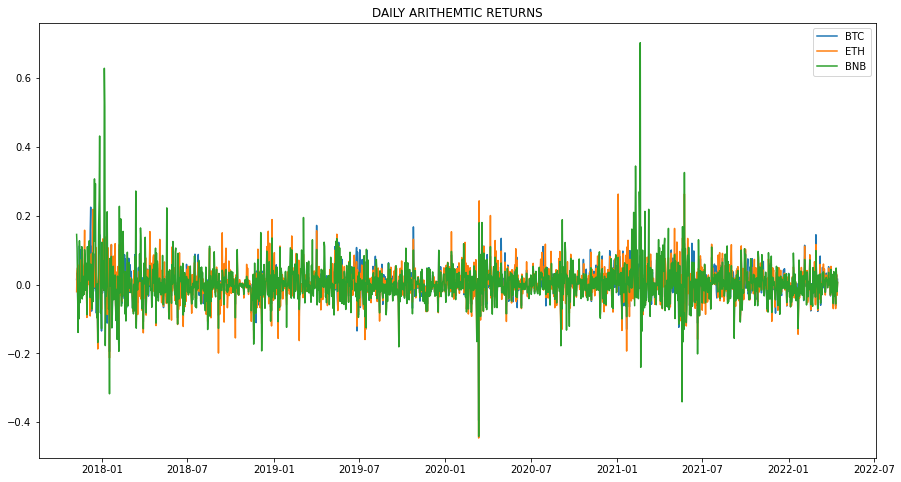

In [11]:
plt.figure(figsize=(15, 8))
plt.plot(daily_returns['BTC'].index, daily_returns['BTC'], label = 'BTC')
plt.plot(daily_returns['ETH'].index, daily_returns['ETH'], label = 'ETH')
plt.plot(daily_returns['BNB'].index, daily_returns['BNB'], label = 'BNB')
plt.title('DAILY ARITHEMTIC RETURNS')
plt.legend()
plt.show()

In [12]:
daily_log_returns = np.log(daily_returns + 1)

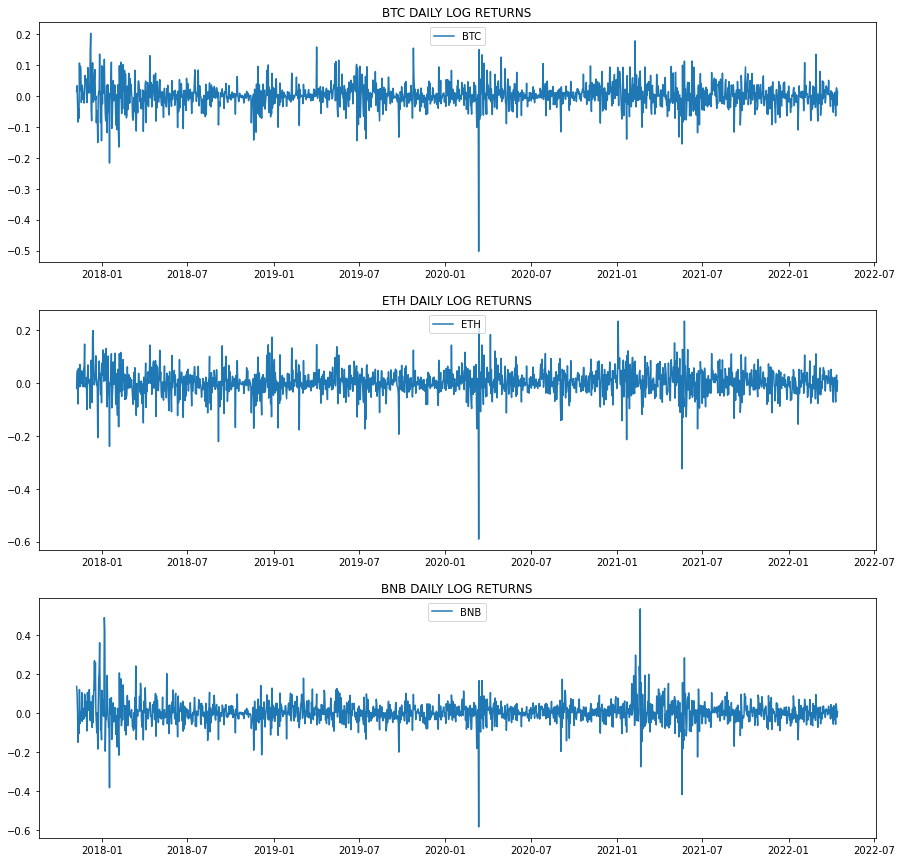

In [13]:
fig, axs = plt.subplots(3)
fig.set_figheight(15)
fig.set_figwidth(15)

axs[0].plot(daily_log_returns['BTC'].index, daily_log_returns['BTC'], label = 'BTC')
axs[0].set_title('BTC DAILY LOG RETURNS')

axs[1].plot(daily_log_returns['ETH'].index, daily_log_returns['ETH'], label = 'ETH')
axs[1].set_title('ETH DAILY LOG RETURNS')

axs[2].plot(daily_log_returns['BNB'].index, daily_log_returns['BNB'], label = 'BNB')
axs[2].set_title('BNB DAILY LOG RETURNS')


axs[0].legend(loc='upper center')
axs[1].legend(loc='upper center')
axs[2].legend(loc='upper center')
plt.show()

In [14]:
#summary statistics log returns

daily_log_returns.describe()

,BTC,ETH,BNB
count,1621.000000,1621.000000,1621.000000
mean,0.001087,0.001433,0.003444
std,0.042057,0.053340,0.062995
min,-0.502607,-0.590534,-0.582287
25%,-0.016530,-0.022013,-0.023784
50%,0.001769,0.001996,0.001945
75%,0.019255,0.028783,0.029745
max,0.202952,0.233750,0.532404


In [15]:
#summary statistics daily returns

daily_returns.describe()

,BTC,ETH,BNB
count,1621.000000,1621.000000,1621.000000
mean,0.001962,0.002835,0.005463
std,0.041476,0.052386,0.065058
min,-0.395048,-0.445969,-0.441381
25%,-0.016395,-0.021772,-0.023503
50%,0.001770,0.001998,0.001947
75%,0.019441,0.029201,0.030192
max,0.225014,0.263329,0.703021


In [16]:
#check stationarity log returns

def check_stationarity(df, symbol):
    """
    The ADF test is used to check stationarity of a series. if the p-value is smaller than 0.05, the series is stationary otherwise not.
    it also indicates the number of lag used.
    """
    df_stationarity_test = adfuller(df, autolag = 'AIC')
    return (f'P-Value {symbol} : ', df_stationarity_test[1])

print(check_stationarity(daily_log_returns['BTC'], 'BTC'),
      check_stationarity(daily_log_returns['ETH'], 'ETH'),
      check_stationarity(daily_log_returns['BNB'], 'BNB'))

('P-Value BTC : ', 0.0) ('P-Value ETH : ', 0.0) ('P-Value BNB : ', 8.557530635758063e-20)


In [17]:
#check stationarity returns

def check_stationarity(df, symbol):
    """
    The ADF test is used to check stationarity of a series. if the p-value is smaller than 0.05, the series is stationary otherwise not.
    it also indicates the number of lag used.
    """
    df_stationarity_test = adfuller(df, autolag = 'AIC')
    return (f'P-Value {symbol} : ', df_stationarity_test[1])

print(check_stationarity(daily_returns['BTC'], 'BTC'),
      check_stationarity(daily_returns['ETH'], 'ETH'),
      check_stationarity(daily_returns['BNB'], 'BNB'))

('P-Value BTC : ', 0.0) ('P-Value ETH : ', 3.652404212043871e-22) ('P-Value BNB : ', 1.2921077531047337e-13)


### FEATURES CONSTRUCTION

In [18]:
open_price = pd.concat([btc_data['open'], eth_data['open'], bnb_data['open']], axis=1, keys=['BTC', 'ETH', 'BNB'])
high_price = pd.concat([btc_data['high'], eth_data['high'], bnb_data['high']], axis=1, keys=['BTC', 'ETH', 'BNB'])
low_price = pd.concat([btc_data['low'], eth_data['low'], bnb_data['low']], axis=1, keys=['BTC', 'ETH', 'BNB'])
close_price = pd.concat([btc_data['close'], eth_data['close'], bnb_data['close']], axis=1, keys=['BTC', 'ETH', 'BNB'])

high_low = pd.concat([btc_data['high']-btc_data['low'], 
                      eth_data['high']-btc_data['low'], 
                      bnb_data['high']-btc_data['low']], 
                      axis=1, keys=['BTC', 'ETH', 'BNB'])

lag_returns1 = pd.concat([daily_log_returns['BTC'].shift(1), 
                          daily_log_returns['ETH'].shift(1), 
                          daily_log_returns['BNB'].shift(1)], axis=1, keys=['BTC', 'ETH', 'BNB'])

lag_returns2 = pd.concat([daily_log_returns['BTC'].shift(2), 
                          daily_log_returns['ETH'].shift(2), 
                          daily_log_returns['BNB'].shift(2)], axis=1, keys=['BTC', 'ETH', 'BNB'])

lag_returns3 = pd.concat([daily_log_returns['BTC'].shift(3), 
                          daily_log_returns['ETH'].shift(3), 
                          daily_log_returns['BNB'].shift(3)], axis=1, keys=['BTC', 'ETH', 'BNB'])

lag_returns4 = pd.concat([daily_log_returns['BTC'].shift(4), 
                          daily_log_returns['ETH'].shift(4), 
                          daily_log_returns['BNB'].shift(4)], axis=1, keys=['BTC', 'ETH', 'BNB'])

lag_returns5 = pd.concat([daily_log_returns['BTC'].shift(5), 
                          daily_log_returns['ETH'].shift(5), 
                          daily_log_returns['BNB'].shift(5)], axis=1, keys=['BTC', 'ETH', 'BNB'])

In [19]:
def moving_average(df, n):
        """Calculate the moving average for the given data.
        
        :param df: pandas.DataFrame
        :param n: window
        :return: pandas.DataFrame
        """
        MA = pd.Series(df['close'].rolling(n, min_periods=n).mean(), name='MA_{}'.format(n))
        
        return MA
ma = pd.concat([moving_average(btc_data, 5), 
                moving_average(eth_data, 5), 
                moving_average(bnb_data, 5)], axis = 1, keys= ['BTC', 'ETH', 'BNB'])

In [20]:
def exponential_moving_average(df, n):
        """
        
        :param df: pandas.DataFrame
        :param n: window of data to take moving exponent mean
        :return: pandas.DataFrame
        """
        EMA = pd.Series(df['close'].ewm(span=n, min_periods=n).mean(), name='EMA_' + str(n))
        return EMA

ema = pd.concat([exponential_moving_average(btc_data, 10), 
                 exponential_moving_average(eth_data, 10),
                 exponential_moving_average(bnb_data, 10)], axis = 1, keys= ['BTC', 'ETH', 'BNB'])

In [21]:
def momentum(df, n):
        """
        
        :param df: pandas.DataFrame 
        :param n: data window
        :return: pandas.DataFrame
        """
        M = pd.Series(df['close'].diff(n), name='Momentum_' + str(n))
        return M
    
momentum = pd.concat([momentum(btc_data, 5), 
                      momentum(eth_data, 5), 
                      momentum(bnb_data, 5)], axis = 1, keys= ['BTC', 'ETH', 'BNB'])

In [22]:
def average_true_range(df, n):
        """
        
        :param df: pandas.DataFrame
        :param n: data window
        :return: pandas.DataFrame
        """
        i = df.index[0]
        TR_l = [0]
        while i < df.index[-1]:
            TR = max(df.loc[i + pd.Timedelta("1 days"), 'high'], df.loc[i, 'close']) - min(df.loc[i + pd.Timedelta("1 days"), 'low'], df.loc[i, 'close'])
            TR_l.append(TR)
            i = i + pd.Timedelta("1 days")
        TR_s = pd.Series(TR_l)
        ATR = pd.Series(TR_s.ewm(span=n, min_periods=n).mean(), name='ATR_' + str(n))
        return ATR

average_true_range_5 = pd.concat([average_true_range(btc_data, 5),
                                  average_true_range(eth_data, 5),
                                  average_true_range(bnb_data, 5)], axis = 1, keys= ['BTC', 'ETH', 'BNB'])

average_true_range_5.index = prices.index

average_true_range_10 = pd.concat([average_true_range(btc_data, 10),
                                  average_true_range(eth_data, 10),
                                  average_true_range(bnb_data, 10)], axis = 1, keys= ['BTC', 'ETH', 'BNB'])

average_true_range_10.index = prices.index



In [23]:
def commodity_channel_index(df, n):
        """Calculate Commodity Channel Index for given data.
        
        :param df: pandas.DataFrame
        :param n: data window
        :return: pandas.DataFrame
        """
        PP = (df['high'] + df['low'] + df['close']) / 3
        CCI = pd.Series((PP - PP.rolling(n, min_periods=n).mean()) / PP.rolling(n, min_periods=n).std(),
                        name='CCI_' + str(n))
        return CCI
    
cci = pd.concat([commodity_channel_index(btc_data, 14), 
                 commodity_channel_index(eth_data, 14), 
                 commodity_channel_index(bnb_data, 14)], axis = 1, keys= ['BTC', 'ETH', 'BNB'])

In [24]:
def rate_of_change(df, n):
        """
        
        :param df: pandas.DataFrame
        :param n: data window
        :return: pandas.DataFrame
        """
        M = df['close'].diff(n - 1)
        N = df['close'].shift(n - 1)
        ROC = pd.Series(M / N, name='ROC_' + str(n))
        return ROC
    
roc_9 = pd.concat([rate_of_change(btc_data, 9),
                 rate_of_change(eth_data, 9),
                 rate_of_change(bnb_data, 9)], axis = 1, keys= ['BTC', 'ETH', 'BNB'])

roc_14 = pd.concat([rate_of_change(btc_data, 14),
                 rate_of_change(eth_data, 14),
                 rate_of_change(bnb_data, 14)], axis = 1, keys= ['BTC', 'ETH', 'BNB'])

In [25]:
def macd(df, n_fast, n_slow):
        """Calculate MACD, MACD Signal and MACD difference
        
        :param df: pandas.DataFrame
        :param n_fast: 
        :param n_slow: 
        :return: pandas.DataFrame
        """
        EMAfast = pd.Series(df['close'].ewm(span=n_fast, min_periods=n_slow).mean())
        EMAslow = pd.Series(df['close'].ewm(span=n_slow, min_periods=n_slow).mean())
        MACD = pd.Series(EMAfast - EMAslow, name='MACD_' + str(n_fast) + '_' + str(n_slow))
        MACDsign = pd.Series(MACD.ewm(span=9, min_periods=9).mean(), name='MACDsign_' + str(n_fast) + '_' + str(n_slow))
        MACDdiff = pd.Series(MACD - MACDsign, name='MACDdiff_' + str(n_fast) + '_' + str(n_slow))
        return MACD, MACDsign, MACDdiff

macd_btc, macd_sign_btc, macd_diff_btc = macd(btc_data, 5, 10)
macd_eth, macd_sign_eth, macd_diff_eth = macd(eth_data, 5, 10)
macd_bnb, macd_sign_bnb, macd_diff_bnb = macd(bnb_data, 5, 10)

In [26]:
def relative_strength_index(df, n):
        """Calculate Relative Strength Index(RSI) for given data.
        
        :param df: pandas.DataFrame
        :param n: data window
        :return: pandas.DataFrame
        """
        i = df.index[0]
        UpI = [0]
        DoI = [0]
        while i + pd.Timedelta("1 days") <= df.index[-1]:
            UpMove = df.loc[i + pd.Timedelta("1 days"), 'high'] - df.loc[i, 'high']
            DoMove = df.loc[i, 'low'] - df.loc[i + pd.Timedelta("1 days"), 'low']
            if UpMove > DoMove and UpMove > 0:
                UpD = UpMove
            else:
                UpD = 0
            UpI.append(UpD)
            if DoMove > UpMove and DoMove > 0:
                DoD = DoMove
            else:
                DoD = 0
            DoI.append(DoD)
            i = i + pd.Timedelta("1 days")
        UpI = pd.Series(UpI)
        DoI = pd.Series(DoI)
        PosDI = pd.Series(UpI.ewm(span=n, min_periods=n).mean())
        NegDI = pd.Series(DoI.ewm(span=n, min_periods=n).mean())
        RSI = pd.Series(PosDI / (PosDI + NegDI), name='RSI_' + str(n))
        return RSI
    
rsi_6 = pd.concat([relative_strength_index(btc_data, 6),
                   relative_strength_index(eth_data, 6),
                   relative_strength_index(bnb_data, 6)], axis = 1, keys= ['BTC', 'ETH', 'BNB'])

rsi_14 = pd.concat([relative_strength_index(btc_data, 14),
                   relative_strength_index(eth_data, 14),
                   relative_strength_index(bnb_data, 14)], axis = 1, keys= ['BTC', 'ETH', 'BNB'])

rsi_6.index = prices.index
rsi_14.index = prices.index

In [27]:
def stochastic_oscillator_k(df):
        """Calculate stochastic oscillator %K for given data.
        
        :param df: pandas.DataFrame
        :return: pandas.DataFrame
        """
        SOk = pd.Series((df['close'] - df['low']) / (df['high'] - df['low']), name='SO%k')
        return SOk

sok = pd.concat([stochastic_oscillator_k(btc_data),
                 stochastic_oscillator_k(eth_data),
                 stochastic_oscillator_k(bnb_data)], axis = 1, keys= ['BTC', 'ETH', 'BNB'])

In [28]:
def exponential_weighted_moving_average(df, com):
    ewm = df['close'].ewm(com = com).mean()
    return ewm

ewm = pd.concat([exponential_weighted_moving_average(btc_data, 0.9), 
                 exponential_weighted_moving_average(eth_data, 0.9), 
                 exponential_weighted_moving_average(bnb_data, 0.9)], axis = 1, keys= ['BTC', 'ETH', 'BNB'])

In [29]:
def dema(df, time_period):
    ema = df['close'].ewm(span=time_period, adjust=False).mean()
    dema = 2*ema - ema.ewm(span=time_period, adjust=False).mean()
    return dema

dema = pd.concat([dema(btc_data, 10), 
                 dema(eth_data, 10), 
                 dema(bnb_data, 10)], axis = 1, keys= ['BTC', 'ETH', 'BNB'])

In [30]:
def get_wr(df, lookback):
    highh = df['high'].rolling(lookback).max() 
    lowl = df['low'].rolling(lookback).min()
    wr = ((highh - df['close'][-1]) / (highh - lowl))
    return wr

wr = pd.concat([get_wr(btc_data, 14), 
                get_wr(eth_data, 14), 
                get_wr(bnb_data, 14)], axis = 1, keys= ['BTC', 'ETH', 'BNB'])

In [31]:
btc_data['return_next'] = btc_data['close'].shift(-1) - btc_data['open'].shift(-1)
btc_data['label'] = btc_data['return_next'].apply(lambda x: 1 if x>0.0 else -1)

eth_data['return_next'] = eth_data['close'].shift(-1) - eth_data['open'].shift(-1)
eth_data['label'] = eth_data['return_next'].apply(lambda x: 1 if x>0.0 else -1)

bnb_data['return_next'] = bnb_data['close'].shift(-1) - bnb_data['open'].shift(-1)
bnb_data['label'] = bnb_data['return_next'].apply(lambda x: 1 if x>0.0 else -1)

In [32]:
btc_data.tail(10)

,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,tb_quote_av,ignore,return_next,label
timestamp,,,,,,,,,,,,,
2022-04-06,45497.54,45507.14,43121.00,43170.47,60849.32936,1649289599999,2.700645e+09,1471912,29467.28381,1.307725e+09,0.0,273.72,1
2022-04-07,43170.47,43900.99,42727.35,43444.19,37396.54156,1649375999999,1.623879e+09,999816,18567.25999,8.063587e+08,0.0,-1192.19,-1
2022-04-08,43444.20,43970.62,42107.14,42252.01,42375.04203,1649462399999,1.830700e+09,1108136,20530.56354,8.871968e+08,0.0,501.95,1
2022-04-09,42252.02,42800.00,42125.48,42753.97,17891.66047,1649548799999,7.592746e+08,640230,8910.47179,3.781580e+08,0.0,-595.11,-1
2022-04-10,42753.96,43410.30,41868.00,42158.85,22771.09403,1649635199999,9.714597e+08,678983,10952.24952,4.674388e+08,0.0,-2628.40,-1
2022-04-11,42158.85,42414.71,39200.00,39530.45,63560.44721,1649721599999,2.602039e+09,1385924,30543.05561,1.251713e+09,0.0,544.49,1
2022-04-12,39530.45,40699.00,39254.63,40074.94,57751.01778,1649807999999,2.309514e+09,1153667,28344.99788,1.133659e+09,0.0,1072.84,1
2022-04-13,40074.95,41561.31,39588.54,41147.79,41342.27254,1649894399999,1.677171e+09,948061,20522.54699,8.326534e+08,0.0,-1205.40,-1
2022-04-14,41147.78,41500.00,39551.94,39942.38,36807.01401,1649980799999,1.494726e+09,803756,17787.82129,7.222166e+08,0.0,609.53,1


In [33]:
features_btc = pd.DataFrame({'open_price': open_price['BTC'],
                            'close_price': close_price['BTC'],
                            'high_price': high_price['BTC'],
                            'low_price': low_price['BTC'],
                            'high_low': high_low['BTC'],
                            'numbers_of_trades': number_trades['BTC'],
                            'dollar_volumne': dollar_volume['BTC'],
                            'crypto_volume': crypto_volume['BTC'],
                            'lag_return1': lag_returns1['BTC'],
                            'lag_return2': lag_returns2['BTC'],
                            'lag_return3': lag_returns3['BTC'],
                            'lag_return4': lag_returns4['BTC'],
                            'lag_return5': lag_returns5['BTC'],
                            'moving_average': ma['BTC'],
                            'exponential_moving_average':ema['BTC'],
                            'momentum': momentum['BTC'],
                            'average_true_range5':average_true_range_5['BTC'],
                            'average_true_range10':average_true_range_10['BTC'],
                            'commodity_channel_index': cci['BTC'],
                            'rate_of_change9':roc_9['BTC'],
                            'rate_of_change14': roc_14['BTC'],
                            'relative_strength_index6':rsi_6['BTC'],
                            'relative_strength_index14':rsi_14['BTC'],
                            'stochastic_oscillator_k': sok['BTC'],
                            'expoential_weighted_moving_average': ewm['BTC'],
                            'double_exponential_moving_average':dema['BTC'],
                            'william_R': wr['BTC'],
                            'macd':macd_btc,
                            'macd_sign':macd_sign_btc,
                            'macd_diff':macd_diff_btc,
                            'label': btc_data['label']
                            })


features_eth = pd.DataFrame({'open_price': open_price['ETH'],
                            'close_price': close_price['ETH'],
                            'high_price': high_price['ETH'],
                            'low_price': low_price['ETH'],
                            'high_low': high_low['ETH'],
                            'numbers_of_trades': number_trades['ETH'],
                            'dollar_volumne': dollar_volume['ETH'],
                            'crypto_volume': crypto_volume['ETH'],
                            'lag_return1': lag_returns1['ETH'],
                            'lag_return2': lag_returns2['ETH'],
                            'lag_return3': lag_returns3['ETH'],
                            'lag_return4': lag_returns4['ETH'],
                            'lag_return5': lag_returns5['ETH'],
                            'moving_average': ma['ETH'],
                            'exponential_moving_average':ema['ETH'],
                            'momentum': momentum['ETH'],
                            'average_true_range5':average_true_range_5['ETH'],
                            'average_true_range10':average_true_range_10['ETH'],
                            'commodity_channel_index': cci['ETH'],
                            'rate_of_change9':roc_9['ETH'],
                            'rate_of_change14': roc_14['ETH'],
                            'relative_strength_index6':rsi_6['ETH'],
                            'relative_strength_index14':rsi_14['ETH'],
                            'stochastic_oscillator_k': sok['ETH'],
                            'expoential_weighted_moving_average': ewm['ETH'],
                            'double_exponential_moving_average':dema['ETH'],
                            'william_R': wr['ETH'],
                            'macd':macd_eth,
                            'macd_sign':macd_sign_eth,
                            'macd_diff':macd_diff_eth,
                            'label': eth_data['label']
                            })


features_bnb = pd.DataFrame({'open_price': open_price['BNB'],
                            'close_price': close_price['BNB'],
                            'high_price': high_price['BNB'],
                            'low_price': low_price['BNB'],
                            'high_low': high_low['BNB'],
                            'numbers_of_trades': number_trades['BNB'],
                            'dollar_volumne': dollar_volume['BNB'],
                            'crypto_volume': crypto_volume['BNB'],
                            'lag_return1': lag_returns1['BNB'],
                            'lag_return2': lag_returns2['BNB'],
                            'lag_return3': lag_returns3['BNB'],
                            'lag_return4': lag_returns4['BNB'],
                            'lag_return5': lag_returns5['BNB'],
                            'moving_average': ma['BNB'],
                            'exponential_moving_average':ema['BNB'],
                            'momentum': momentum['BNB'],
                            'average_true_range5':average_true_range_5['BNB'],
                            'average_true_range10':average_true_range_10['BNB'],
                            'commodity_channel_index': cci['BNB'],
                            'rate_of_change9':roc_9['BNB'],
                            'rate_of_change14': roc_14['BNB'],
                            'relative_strength_index6':rsi_6['BNB'],
                            'relative_strength_index14':rsi_14['BNB'],
                            'stochastic_oscillator_k': sok['BNB'],
                            'expoential_weighted_moving_average': ewm['BNB'],
                            'double_exponential_moving_average':dema['BNB'],
                            'william_R': wr['BNB'],
                            'macd':macd_bnb,
                            'macd_sign':macd_sign_bnb,
                            'macd_diff':macd_diff_bnb,
                            'label': bnb_data['label']
                            })

In [34]:
features_btc.head(10)

,open_price,close_price,high_price,low_price,high_low,numbers_of_trades,dollar_volumne,crypto_volume,lag_return1,lag_return2,...,relative_strength_index6,relative_strength_index14,stochastic_oscillator_k,expoential_weighted_moving_average,double_exponential_moving_average,william_R,macd,macd_sign,macd_diff,label
timestamp,,,,,,,,,,,,,,,,,,,,,
2017-11-06,7345.10,6960.12,7401.00,6906.00,495.00,13525,1.267352e+07,1763.019261,NaN,NaN,...,NaN,NaN,0.109333,6960.120000,6960.120000,NaN,NaN,NaN,NaN,1
2017-11-07,6981.72,7064.04,7198.49,6901.00,297.49,13132,1.017327e+07,1440.259494,NaN,NaN,...,NaN,NaN,0.548052,7030.637143,6994.473719,NaN,NaN,NaN,NaN,1
2017-11-08,7070.00,7303.00,7770.02,6651.00,1119.02,24381,2.049129e+07,2822.298802,0.014820,NaN,...,NaN,NaN,0.582653,7191.033540,7098.765590,NaN,NaN,NaN,NaN,-1
2017-11-09,7303.01,7079.99,7392.00,7015.00,377.00,13818,1.379853e+07,1913.398308,0.033268,0.014820,...,NaN,NaN,0.172387,7129.491229,7101.610046,NaN,NaN,NaN,NaN,-1
2017-11-10,7079.00,6506.98,7279.91,6255.01,1024.90,18889,2.208335e+07,3254.704105,-0.031013,0.033268,...,NaN,NaN,0.245848,6793.849493,6913.374680,NaN,NaN,NaN,NaN,-1
2017-11-11,6503.00,6245.05,6797.98,6100.00,697.98,17840,1.768145e+07,2754.156861,-0.084397,-0.031013,...,0.229527,NaN,0.207814,6501.707552,6687.342917,NaN,NaN,NaN,NaN,-1
2017-11-12,6245.05,5811.03,6630.00,5325.01,1304.99,31069,2.971151e+07,4968.483069,-0.041086,-0.084397,...,0.104537,NaN,0.372432,6136.237477,6377.933458,NaN,NaN,NaN,NaN,1
2017-11-13,5839.94,6465.99,6697.47,5699.99,997.48,16165,1.649814e+07,2621.243039,-0.072031,-0.041086,...,0.160272,NaN,0.767935,6310.232446,6368.583211,NaN,NaN,NaN,NaN,1
2017-11-14,6465.99,6574.99,6684.98,6311.07,373.91,10476,8.168730e+06,1254.292531,0.106798,-0.072031,...,0.160272,NaN,0.705838,6449.746028,6401.577071,NaN,NaN,NaN,NaN,1


In [35]:
features_btc.dropna(inplace=True)
features_eth.dropna(inplace=True)
features_bnb.dropna(inplace=True)

In [36]:
features_btc.head(10)

,open_price,close_price,high_price,low_price,high_low,numbers_of_trades,dollar_volumne,crypto_volume,lag_return1,lag_return2,...,relative_strength_index6,relative_strength_index14,stochastic_oscillator_k,expoential_weighted_moving_average,double_exponential_moving_average,william_R,macd,macd_sign,macd_diff,label
timestamp,,,,,,,,,,,,,,,,,,,,,
2017-11-23,8233.03,8019.99,8260.00,8000.00,260.00,16625,3.340070e+07,4093.952687,0.010586,-0.011327,...,0.563178,0.612548,0.076885,8080.807004,8182.188709,-10.455936,223.096506,251.623129,-28.526623,1
2017-11-24,8019.97,8138.00,8369.00,7850.00,519.00,19754,3.584026e+07,4411.789112,-0.022919,0.010586,...,0.389669,0.543445,0.554913,8110.908602,8227.869779,-10.455936,198.635077,239.750730,-41.115652,1
2017-11-25,8138.99,8700.01,8734.78,8090.00,644.78,18632,3.609301e+07,4292.623682,0.014607,-0.022919,...,0.702539,0.653447,0.946075,8420.962069,8441.267197,-9.331163,256.580908,243.433076,13.147831,1
2017-11-26,8700.04,9128.02,9350.00,8604.72,745.28,19268,3.713853e+07,4147.380237,0.066780,0.014607,...,0.865224,0.763863,0.702152,8793.097879,8734.164404,-8.548442,336.330306,263.383506,72.946801,1
2017-11-27,9128.00,9650.00,9654.28,9112.04,542.24,22806,4.296106e+07,4521.625707,0.048025,0.066780,...,0.902244,0.800192,0.992107,9244.099028,9115.811480,-9.241902,437.377865,300.206757,137.171108,1
2017-11-28,9650.00,9896.80,9939.00,9570.50,368.50,18923,4.823564e+07,4917.210985,0.055609,0.048025,...,0.928112,0.828654,0.885482,9587.625867,9470.540134,-9.102828,502.923221,342.615193,160.308029,-1
2017-11-29,9896.79,9687.88,11300.03,8520.00,2780.03,47894,1.359762e+08,13352.538715,0.025254,0.055609,...,0.974056,0.904045,0.420096,9640.391201,9653.029891,-6.925109,476.835527,370.438194,106.397333,1
2017-11-30,9687.88,9838.96,10900.00,8850.80,2049.20,41153,9.143090e+07,9389.574329,-0.021336,0.025254,...,0.974056,0.904045,0.482217,9744.901096,9826.288326,-7.542972,456.412405,388.131046,68.281359,1
2017-12-01,9837.00,10782.99,10898.00,9380.00,1518.00,32375,6.226070e+07,6134.923633,0.015474,-0.021336,...,0.974056,0.904045,0.924236,10291.263679,10254.766177,-7.542972,559.715482,423.238482,136.477000,1


## STANDARDIZATION AND SPLIT

In [37]:
def standardize(features_df):
    list_of_columns_to_exclude = ['label']
    X_temp_standardized = features_df.copy(deep=True)
    X_temp_standardized.drop(list_of_columns_to_exclude, axis = 1, inplace = True) # drop target variable


    dates = X_temp_standardized.index # get dates to set as index after data is standardized
    names = X_temp_standardized.columns # Get column names first
    X_temp_standardized = StandardScaler().fit_transform(X_temp_standardized)

    # Convert to DataFrame
    X_temp_standardized = pd.DataFrame(X_temp_standardized, columns=names, index=dates)
    X = X_temp_standardized

    ### Get y
    ##########################################################################################

    y = pd.DataFrame(features_df["label"], index=X.index)
    y = y['label']


    ### Sanity Check
    print("Shape of X: ", X.shape)
    print("Shape of y: ", y.shape)

    # Check Types
    print(type(X)) # Needs to be <class 'pandas.core.frame.DataFrame'>
    print(type(y)) # Needs ro be <class 'pandas.core.series.Series'>
    
    return X,y

def train_test_split(X,y, split_date):
    X_train_all = X.loc[(X.index < split_date)]
    y_train_all = y[X_train_all.index]

    # # creates all test data which is all after January 2018
    X_test = X.loc[(X.index >= split_date),:]
    y_test = y[X_test.index]

    ### Sanity Check
    print("Shape of X_train_all: ", X_train_all.shape)
    print("Shape of y_train_all: ", y_train_all.shape)
    print("Shape of X_test:      ", X_test.shape)
    print("Shape of y_test:      ", y_test.shape)
    
    return X_train_all, y_train_all, X_test, y_test

X_btc, y_btc = standardize(features_btc)
X_eth, y_eth = standardize(features_eth)
X_bnb, y_bnb = standardize(features_bnb)

X_train_all_btc, y_train_all_btc, X_test_btc, y_test_btc = train_test_split(X_btc, y_btc, '2022-01-01')
X_train_all_eth, y_train_all_eth, X_test_eth, y_test_eth = train_test_split(X_eth, y_eth, '2022-01-01')
X_train_all_bnb, y_train_all_bnb, X_test_bnb, y_test_bnb = train_test_split(X_btc, y_bnb, '2022-01-01')

Shape of X:  (1605, 30)
Shape of y:  (1605,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
Shape of X:  (1605, 30)
Shape of y:  (1605,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
Shape of X:  (1605, 30)
Shape of y:  (1605,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
Shape of X_train_all:  (1500, 30)
Shape of y_train_all:  (1500,)
Shape of X_test:       (105, 30)
Shape of y_test:       (105,)
Shape of X_train_all:  (1500, 30)
Shape of y_train_all:  (1500,)
Shape of X_test:       (105, 30)
Shape of y_test:       (105,)
Shape of X_train_all:  (1500, 30)
Shape of y_train_all:  (1500,)
Shape of X_test:       (105, 30)
Shape of y_test:       (105,)


### LOGISTIC REGRESSION

In [38]:
clf_btc = LogisticRegression(random_state=0).fit(X_train_all_btc, y_train_all_btc)
pred_btc = clf_btc.predict(X_test_btc)
result_lr_btc = pd.DataFrame()
result_lr_btc['label']  = y_test_btc
result_lr_btc['pred']   = pred_btc
result_lr_btc['won']    = result_lr_btc['label'] == result_lr_btc['pred']
winning_percentage_lr_btc = result_lr_btc[result_lr_btc['won'] == True]['won'].count()/result_lr_btc['won'].count()
print("Winning percentage for bitcoin: %f" % winning_percentage_lr_btc) 

Winning percentage for bitcoin: 0.533333


In [39]:
clf_eth = LogisticRegression(random_state=123).fit(X_train_all_eth, y_train_all_eth)
pred_eth = clf_eth.predict(X_test_eth)
result_lr_eth = pd.DataFrame()
result_lr_eth['label']  = y_test_eth
result_lr_eth['pred']   = pred_eth
result_lr_eth['won']    = result_lr_eth['label'] == result_lr_eth['pred']
winning_percentage_lr_eth = result_lr_eth[result_lr_eth['won'] == True]['won'].count()/result_lr_eth['won'].count()
print("Winning percentage for ethereum: %f" % winning_percentage_lr_eth) 

Winning percentage for ethereum: 0.580952


In [40]:
clf_bnb = LogisticRegression(random_state=56).fit(X_train_all_bnb, y_train_all_bnb)
pred_bnb = clf_bnb.predict(X_test_bnb)
result_lr_bnb = pd.DataFrame()
result_lr_bnb['label']  = y_test_bnb
result_lr_bnb['pred']   = pred_bnb
result_lr_bnb['won']    = result_lr_bnb['label'] == result_lr_bnb['pred']
winning_percentage_lr_bnb = result_lr_bnb[result_lr_bnb['won'] == True]['won'].count()/result_lr_bnb['won'].count()
print("Winning percentage for binance: %f" % winning_percentage_lr_bnb)

Winning percentage for binance: 0.495238


### RANDOM FOREST CLASSIFIER

In [41]:
rf_btc = RandomForestClassifier(random_state = 12,n_estimators = 100, 
                             max_depth = 10).fit(X_train_all_btc, y_train_all_btc)
pred_rf_btc = rf_btc.predict(X_test_btc)
result_rf_btc = pd.DataFrame()
result_rf_btc['label']  = y_test_btc
result_rf_btc['pred']   = pred_rf_btc
result_rf_btc['won']    = result_rf_btc['label'] == result_rf_btc['pred']
winning_percentage_rf_btc = result_rf_btc[result_rf_btc['won'] == True]['won'].count()/result_rf_btc['won'].count()
print("Winning percentage: %f" % winning_percentage_rf_btc)

Winning percentage: 0.561905


In [42]:
rf_eth = RandomForestClassifier(random_state = 122,n_estimators = 100, 
                             max_depth = 10).fit(X_train_all_eth, y_train_all_eth)
pred_rf_eth = rf_eth.predict(X_test_eth)
result_rf_eth = pd.DataFrame()
result_rf_eth['label']  = y_test_eth
result_rf_eth['pred']   = pred_rf_eth
result_rf_eth['won']    = result_rf_eth['label'] == result_rf_eth['pred']
winning_percentage_rf_eth = result_rf_eth[result_rf_eth['won'] == True]['won'].count()/result_rf_eth['won'].count()
print("Winning percentage: %f" % winning_percentage_rf_eth)

Winning percentage: 0.552381


In [43]:
rf_bnb = RandomForestClassifier(random_state = 126,n_estimators = 100, 
                             max_depth = 10).fit(X_train_all_bnb, y_train_all_bnb)
pred_rf_bnb = rf_bnb.predict(X_test_bnb)
result_rf_bnb = pd.DataFrame()
result_rf_bnb['label']  = y_test_bnb
result_rf_bnb['pred']   = pred_rf_bnb
result_rf_bnb['won']    = result_rf_bnb['label'] == result_rf_bnb['pred']
winning_percentage_rf_bnb = result_rf_bnb[result_rf_bnb['won'] == True]['won'].count()/result_rf_bnb['won'].count()
print("Winning percentage: %f" % winning_percentage_rf_bnb)

Winning percentage: 0.523810


### SUPPORT VECTOR MACHINE

In [44]:
svc_btc = SVC(random_state = 123).fit(X_train_all_btc, y_train_all_btc)
pred_svc_btc = svc_btc.predict(X_test_btc)
result_svc_btc = pd.DataFrame()
result_svc_btc['label']  = y_test_btc
result_svc_btc['pred']   = pred_svc_btc
result_svc_btc['won']    = result_svc_btc['label'] == result_svc_btc['pred']
winning_percentage_svc_btc = result_svc_btc[result_svc_btc['won'] == True]['won'].count()/result_svc_btc['won'].count()
print("Winning percentage: %f" % winning_percentage_svc_btc) 

Winning percentage: 0.552381


In [45]:
svc_eth = SVC(random_state = 1234).fit(X_train_all_eth, y_train_all_eth)
pred_svc_eth = svc_eth.predict(X_test_eth)
result_svc_eth = pd.DataFrame()
result_svc_eth['label']  = y_test_eth
result_svc_eth['pred']   = pred_svc_eth
result_svc_eth['won']    = result_svc_eth['label'] == result_svc_eth['pred']
winning_percentage_svc_eth = result_svc_eth[result_svc_eth['won'] == True]['won'].count()/result_svc_eth['won'].count()
print("Winning percentage: %f" % winning_percentage_svc_eth) 

Winning percentage: 0.609524


In [46]:
svc_bnb = SVC(random_state = 12345).fit(X_train_all_bnb, y_train_all_bnb)
pred_svc_bnb = svc_bnb.predict(X_test_bnb)
result_svc_bnb = pd.DataFrame()
result_svc_bnb['label']  = y_test_bnb
result_svc_bnb['pred']   = pred_svc_bnb
result_svc_bnb['won']    = result_svc_bnb['label'] == result_svc_bnb['pred']
winning_percentage_svc_bnb = result_svc_bnb[result_svc_bnb['won'] == True]['won'].count()/result_svc_bnb['won'].count()
print("Winning percentage: %f" % winning_percentage_svc_bnb) 
print('accuracy score: %f' % accuracy_score(result_svc_bnb['label'],result_svc_bnb['pred'] ))

Winning percentage: 0.561905
accuracy score: 0.561905


## FEATURE IMPORTANCE

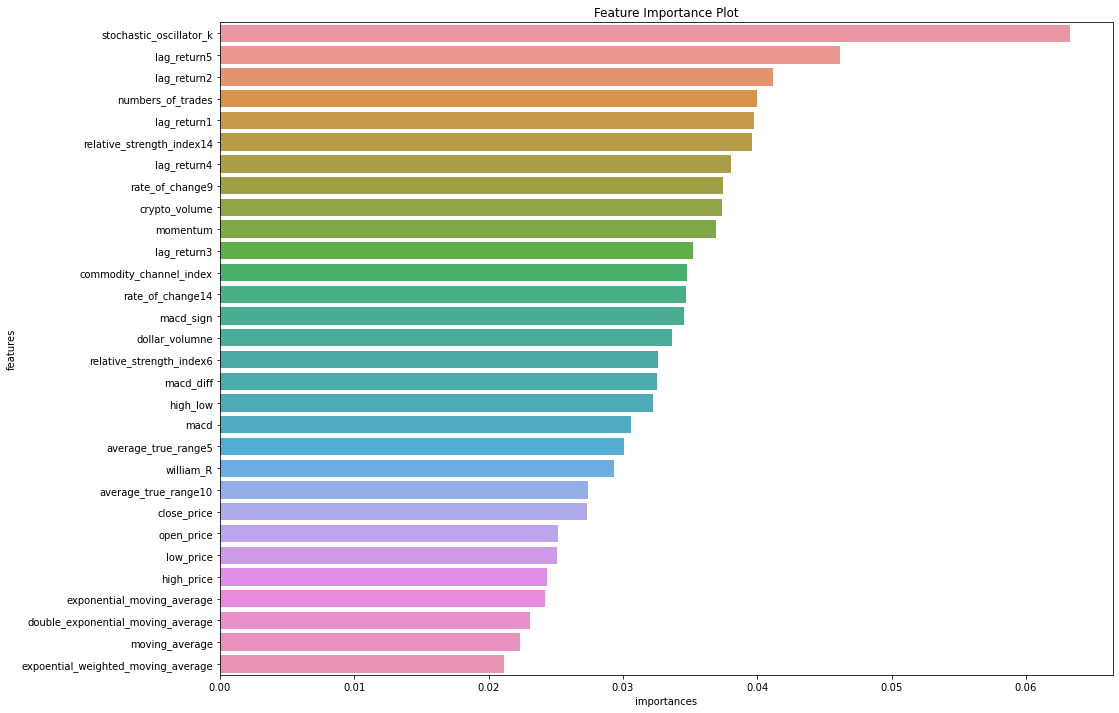

In [47]:
# BTC

def feature_importance(Xf, Yf, clf):
    import matplotlib.pyplot as plt
    import seaborn as sns
    clf.fit(Xf, Yf)
    importance = pd.DataFrame({'features': Xf.columns,
                        'importances': clf.feature_importances_})
    importance = importance.sort_values('importances', ascending=False)
    plt.figure(figsize = (16,12))
    sns.barplot(importance.importances, importance.features)
    plt.title('Feature Importance Plot')
    plt.show()
    
feature_importance(X_train_all_btc, y_train_all_btc, rf_btc)

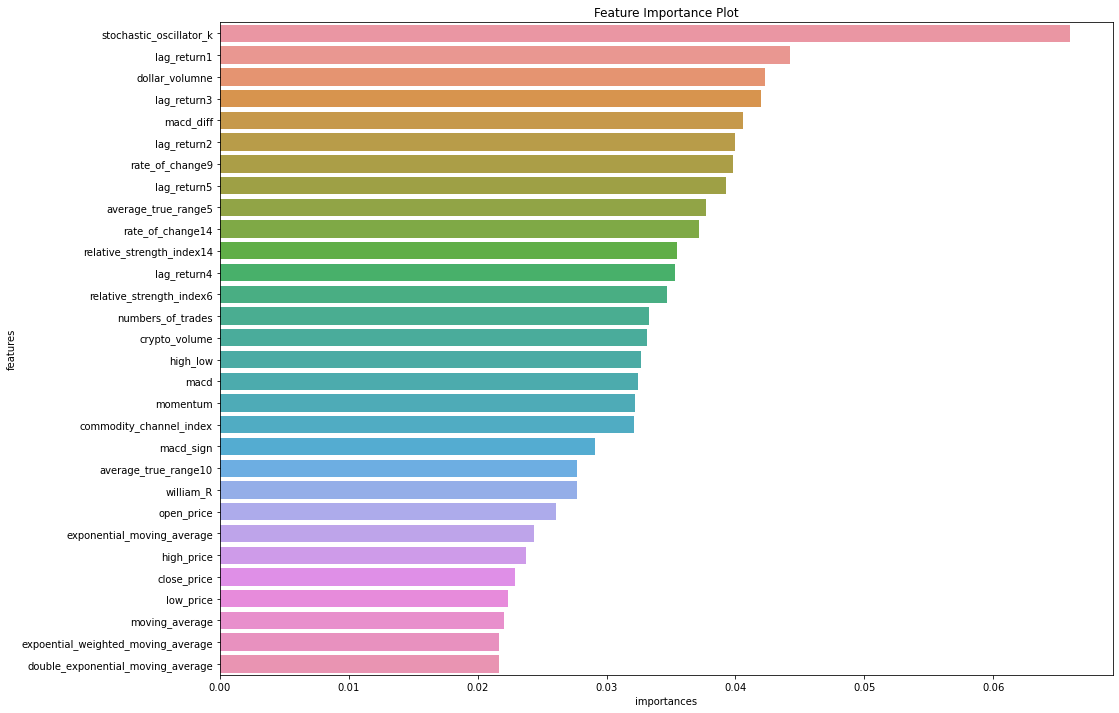

In [48]:
# ETH

def feature_importance(Xf, Yf, clf):
    import matplotlib.pyplot as plt
    import seaborn as sns
    clf.fit(Xf, Yf)
    importance = pd.DataFrame({'features': Xf.columns,
                        'importances': clf.feature_importances_})
    importance = importance.sort_values('importances', ascending=False)
    plt.figure(figsize = (16,12))
    sns.barplot(importance.importances, importance.features)
    plt.title('Feature Importance Plot')
    plt.show()
    
feature_importance(X_train_all_eth, y_train_all_eth, rf_eth)

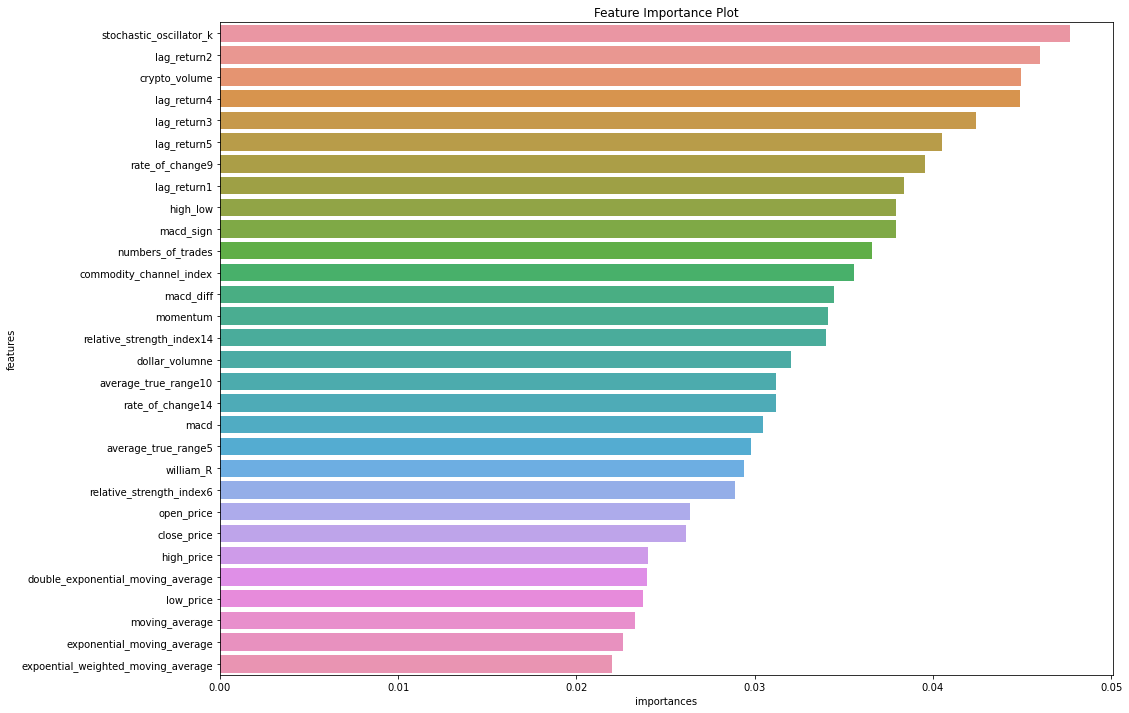

In [49]:
# BNB

def feature_importance(Xf, Yf, clf):
    import matplotlib.pyplot as plt
    import seaborn as sns
    clf.fit(Xf, Yf)
    importance = pd.DataFrame({'features': Xf.columns,
                        'importances': clf.feature_importances_})
    importance = importance.sort_values('importances', ascending=False)
    plt.figure(figsize = (16,12))
    sns.barplot(importance.importances, importance.features)
    plt.title('Feature Importance Plot')
    plt.show()
    
feature_importance(X_train_all_bnb, y_train_all_bnb, rf_bnb)